In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append("../common")
import functions

# Q41～Q43 Cannyエッジ検出

Cannyエッジ検出の手順  
1. ガウシアンフィルタをかける
2. Sobelフィルタを用いてエッジ強度, エッジ勾配を計算する
3. エッジ勾配の値からNon-maximum supressionを行い, エッジの細線化を行う
4. ヒステリシスにより閾値処理を行う.

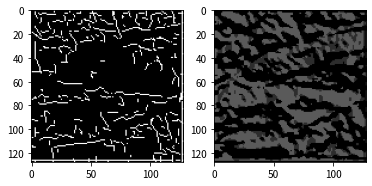

In [3]:
img = cv2.imread("imori.jpg")
# グレースケール変換
img_gray = functions.grayscale(img)
# ガウシアンフィルタ
img_gaussian= functions.gaussian_filter(img_gray,5,1.4)
# sobelフィルタ
img_sobel_x = functions.sobel_filter(img_gaussian,"x")
img_sobel_y = functions.sobel_filter(img_gaussian,"y")
# エッジ強度, 勾配を計算
edge,angle = functions.get_edge_angle(img_sobel_x,img_sobel_y)
angle = functions.angle_quantization(angle)
edge = functions.non_maximum_suppression1(angle,edge)
edge = functions.hysterisis(edge, 50, 20)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(edge.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(angle, cv2.COLOR_BGR2RGB))
plt.show()

# Q44～Q46 Hough変換と直線検出

Hough検出は直交座標を極座標に変換することで直線や円を検出する手法である.  
手順  
1. エッジ検出(Canny法)の結果から, エッジのピクセルに対してHough変換を行う.
2. Hough変換後の値のヒストグラムをとり, 極大点を選ぶ.
3. 極大点のr, tの値をHough逆変換して検出した直線のパラメータを得る.

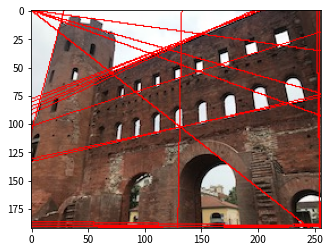

In [4]:
img = cv2.imread("thorino.jpg")
# Canny法
# グレースケール変換
img_gray = functions.grayscale(img)
# ガウシアンフィルタ
img_gaussian= functions.gaussian_filter(img_gray,5,1.4)
# sobelフィルタ
img_sobel_x = functions.sobel_filter(img_gaussian,"x")
img_sobel_y = functions.sobel_filter(img_gaussian,"y")
# エッジ強度, 勾配を計算
edge,angle = functions.get_edge_angle(img_sobel_x,img_sobel_y)
angle = functions.angle_quantization(angle)
edge = functions.non_maximum_suppression1(angle,edge)
edge = functions.hysterisis(edge, 50, 20)

# Hough変換
hough = functions.hough_transform(edge)
# non maximum supression
nms = functions.non_maximum_suppression2(hough)
result = functions.inverse_hough(nms,img)

plt.imshow(cv2.cvtColor(result.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.show()

# Q47 モルフォロジー処理(膨張)

imori.jpgを大津の二値化したものに、モルフォロジー処理による膨張を2回行え。

best threshold =146


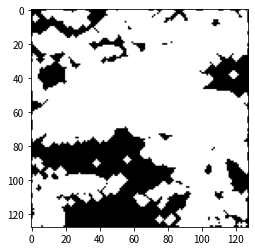

In [3]:
img = cv2.imread("imori.jpg")
# グレースケール, 大津の二値化
gray_img = functions.grayscale(img)
binary_img = functions.ootu_binary(gray_img)

result = functions.morphology_expand(binary_img)
result = functions.morphology_expand(result)

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

# Q48 モルフォロジー処理(収縮)

imori.jpgを大津の二値化したものに、モルフォロジー処理による収縮を2回行え。

best threshold =146


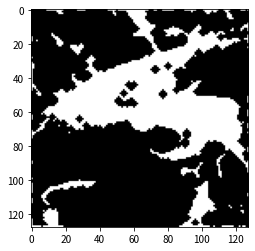

In [3]:
img = cv2.imread("imori.jpg")
# グレースケール, 大津の二値化
gray_img = functions.grayscale(img)
binary_img = functions.ootu_binary(gray_img)

result = functions.morphology_shrinkage(binary_img)
result = functions.morphology_shrinkage(result)

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

# Q49 オープニング処理

大津の二値化後に、オープニング処理(N=1)を行え。

オープニング処理とは、モルフォロジー処理の収縮をN回行った後に膨張をN回行う処理である。

best threshold =146


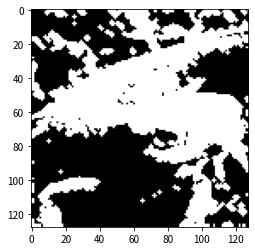

In [4]:
n=1

img = cv2.imread("imori.jpg")
# グレースケール, 大津の二値化
gray_img = functions.grayscale(img)
binary_img = functions.ootu_binary(gray_img)

result = np.copy(binary_img)
for i in range(n):
    result = functions.morphology_shrinkage(result)
    
for i in range(n):
    result = functions.morphology_expand(result)

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

# Q49 クロージング処理

Canny検出した後に、クロージング処理(N=1)を行え。

クロージング処理とは、モルフォロジー処理の膨張をN回行った後に収縮をN回行う処理である。

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


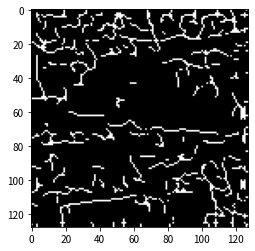

In [5]:
n=1
img = cv2.imread("imori.jpg")
# グレースケール変換
img_gray = functions.grayscale(img)
# ガウシアンフィルタ
img_gaussian= functions.gaussian_filter(img_gray,5,1.4)
# sobelフィルタ
img_sobel_x = functions.sobel_filter(img_gaussian,"x")
img_sobel_y = functions.sobel_filter(img_gaussian,"y")
# エッジ強度, 勾配を計算
edge,angle = functions.get_edge_angle(img_sobel_x,img_sobel_y)
angle = functions.angle_quantization(angle)
edge = functions.non_maximum_suppression1(angle,edge)
edge = functions.hysterisis(edge, 50, 20)

result = np.copy(edge)
for i in range(n):
    result = functions.morphology_expand(result)
    
for i in range(n):
    result = functions.morphology_shrinkage(result)
    
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()